In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
players_data = pd.read_csv('/content/euro2024_players.csv')
print(players_data.head())

                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 1899 Hoffenheim     187   
3     Nico Schlotterbeck  Centre-Back   24    Borussia Dortmund     191   
4           Jonathan Tah  Centre-Back   28  Bayer 04 Leverkusen     195   

    Foot  Caps  Goals  MarketValue  Country  
0  right    40      0     28000000  Germany  
1  right   119      0      4000000  Germany  
2  right     0      0      3000000  Germany  
3   left    12      0     40000000  Germany  
4  right    25      0     30000000  Germany  


In [ ]:
print(players_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB
None


In [ ]:
print(players_data.describe())

              Age      Height        Caps       Goals   MarketValue
count  623.000000  623.000000  623.000000  623.000000  6.230000e+02
mean    27.040128  184.181380   30.338684    4.152488  1.840903e+07
std      4.124275    6.569258   30.987902   10.086803  2.426195e+07
min     16.000000  167.000000    0.000000    0.000000  5.000000e+04
25%     24.000000  180.000000    7.000000    0.000000  2.900000e+06
50%     27.000000  185.000000   21.000000    1.000000  9.000000e+06
75%     30.000000  189.000000   42.000000    4.000000  2.500000e+07
max     41.000000  202.000000  206.000000  128.000000  1.800000e+08


In [ ]:
print(players_data.isnull().sum())

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64


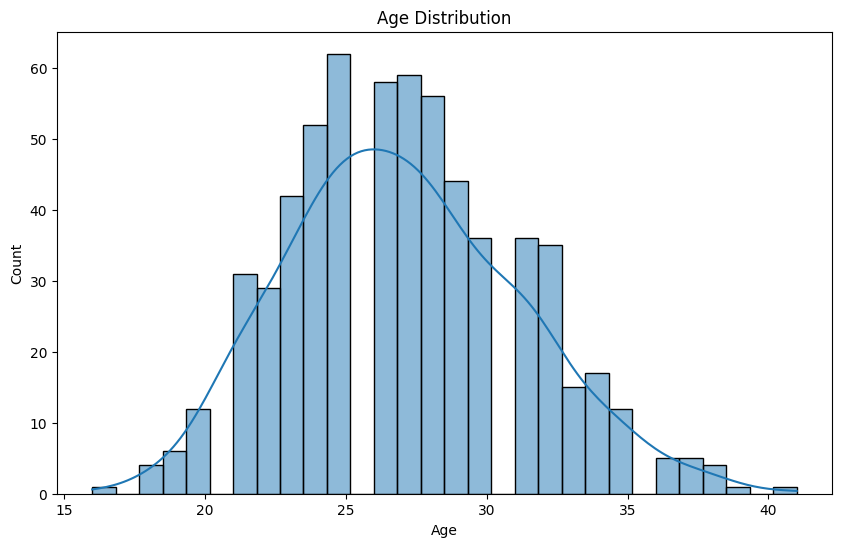

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(players_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

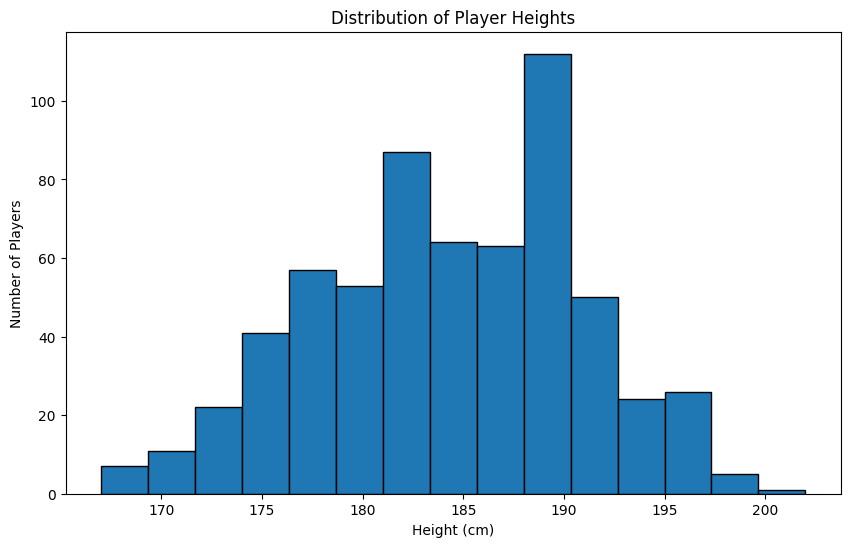

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(players_data['Height'], bins=15, edgecolor='black')
plt.title('Distribution of Player Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Players')
plt.show()

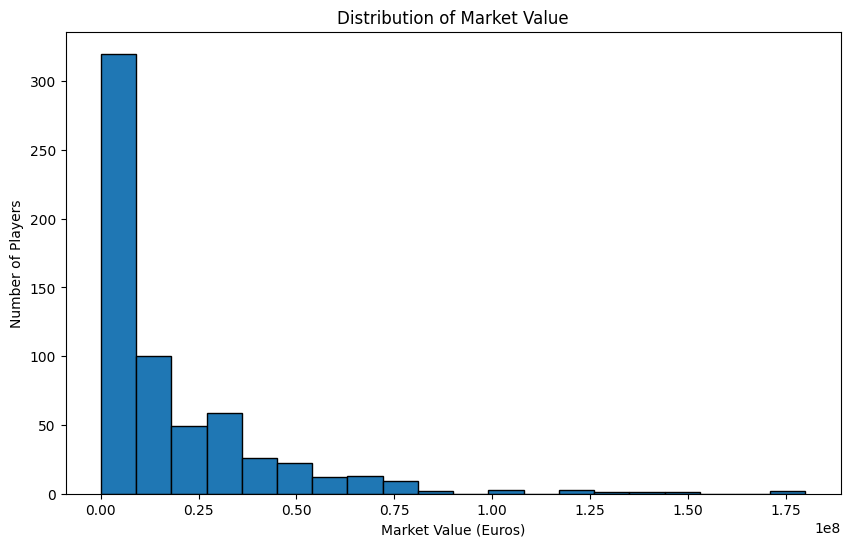

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(players_data['MarketValue'], bins=20, edgecolor='black')
plt.title('Distribution of Market Value')
plt.xlabel('Market Value (Euros)')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
features = players_data[['Position', 'Age', 'Height', 'Foot', 'Caps', 'Goals', 'Country']]
target = players_data['MarketValue']

features_encoded = pd.get_dummies(features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse

15538228.785054693

In [ ]:
x = players_data.drop(['Name','MarketValue'],axis=1)
y = players_data['MarketValue']